In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

Got help from https://www.kaggle.com/code/shtrausslearning/bayesian-regression-house-price-prediction <br>
And also https://www.kaggle.com/code/heyrobin/house-price-prediction-beginner-s-notebook


# DATA PREPARATION 

In [8]:
df = pd.read_csv('housing.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


# kNN Unsupervised Learning Imputation
Function to impuse missing data using an unsupervised model.

In [16]:
from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe 
def impute_knn(df):
    
    ''' inputs: pandas df containing feature matrix '''
    ''' outputs: dataframe with NaN imputed '''
    # imputation with KNN unsupervised method

    # separate dataframe into numerical/categorical
    ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan 

    for col in cols_nan:                
        imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ldf.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[df[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ldf,ldf_putaside],axis=1)
# Call function that imputes missing data
df2 = impute_knn(df)
# looks like we have a full feature matrix
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# train_test_split

In [93]:
cols = df.columns.tolist()
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [97]:
cols = ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value',
 ]
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [102]:
df3 = df2[cols]
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


In [110]:
df3.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [115]:
df3['ocean_proximity'] = df3['ocean_proximity'].str.replace('NEAR BAY','0')
df3['ocean_proximity'] = df3['ocean_proximity'].str.replace('<1H OCEAN', '1')
df3['ocean_proximity'] = df3['ocean_proximity'].str.replace('INLAND','2')
df3['ocean_proximity'] = df3['ocean_proximity'].str.replace('NEAR OCEAN','3')
df3['ocean_proximity'] = df3['ocean_proximity'].str.replace('ISLAND','4')
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,342200.0


In [116]:
X = df3.iloc[:,:-1].values
y = df3.iloc[:,-1].values

In [117]:
from sklearn.model_selection import train_test_split

train_data,test_data = train_test_split(df2,test_size=0.3,random_state=43)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

# EXPLORATORY DATA ANALYSIS

EDA - UNIVARIATE HISTOGRAMS<br>
Lets look at our data distribution, using univariate analysis (analysis of 1 variable). What we might look for in histograms:<br>
<br>
Data distribution ( certain models prefer less skewed distributions ) <br>
Outliers ( Low Noise Assumption can be detremental to model performance )<br>
Odd patterns in data ( Data abnormalities also affect model performance )<br>
Axis Scale ( Feature scale values can affect a models performance )<br>

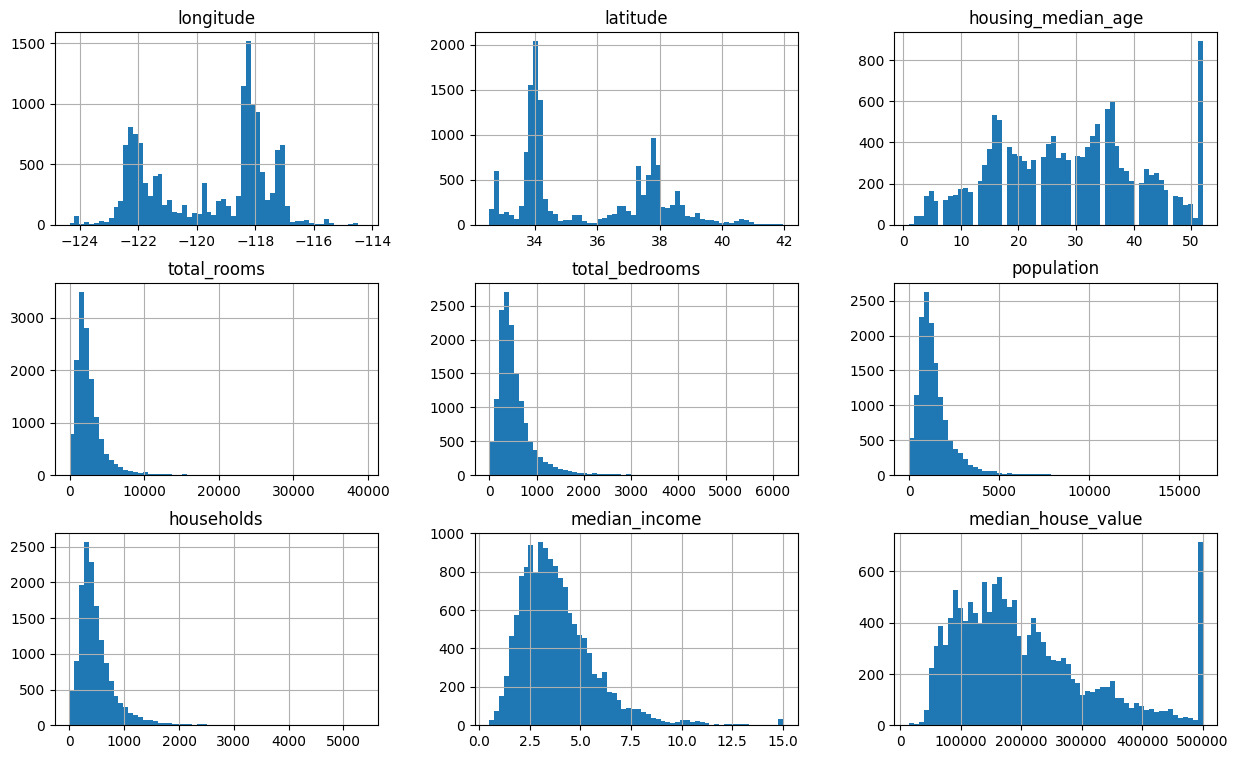

In [24]:
train_data.hist(bins=60, figsize=(15,9))

<h3>Odd Patterns & Outliers</h3>
Data distributions which slightly sticks out:<br>
On first impression, a few outlier (inconsistent with entire set) groups are present in our data; possibly due to the way in which the data was sampled ( 'housing_median_age' & 'median_house_value' )<br>
House_median_age is one possible feature with such outliers. Also having a lot of local peaks (all are quite gradual) but one really odd peak at the maximum value stands out. It has some slight discontinuity in data (which becomes visible with the adjustment of bins)<br>
Feature Median_house_value has an odd peak at its maximum value (around 500k), which could be an outlier.<br>
<br>
<h3>Less Noticeable Outliers</h3>
We have quite a few skewed (less centralised) data distributions, 6 features have such distributions, which is quite a lot and slightly concerning since we are going to use a relatively simple model.<br>
The range of the x axis for some of these features is quite broad (eg. population), indicating we have quite a few outliers, but unlike the first two, we can apply transformation to features and attempt to correct it.<br>
Population, total_bedrooms and total_rooms represent somewhat connected things, also have similar distribution which is skewed towards smaller values.<br>

# CORRELATION 

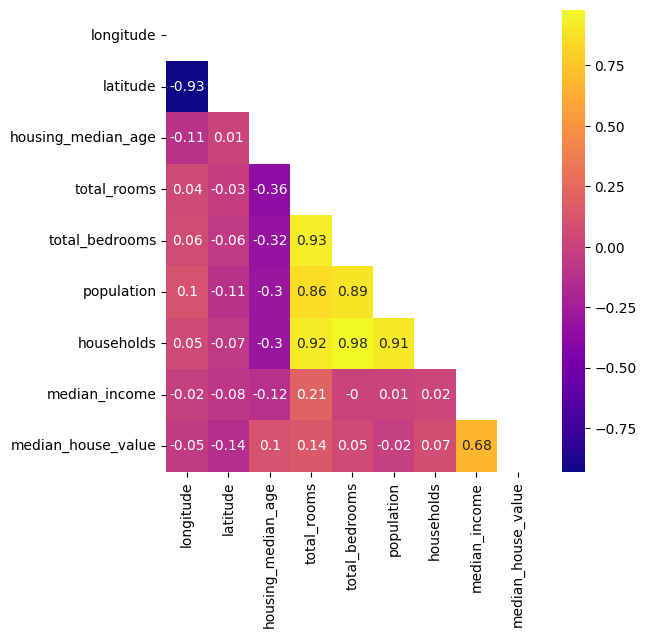

In [64]:
def corrMat(df,id=False):
    corr_mat = df.corr(numeric_only = True).round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,cmap='plasma',annot=True)
    plt.show()  
corrMat(train_data) # plot masked numpy correlation matrix

remove the outlier for median_house_value by simply selecting the maximum

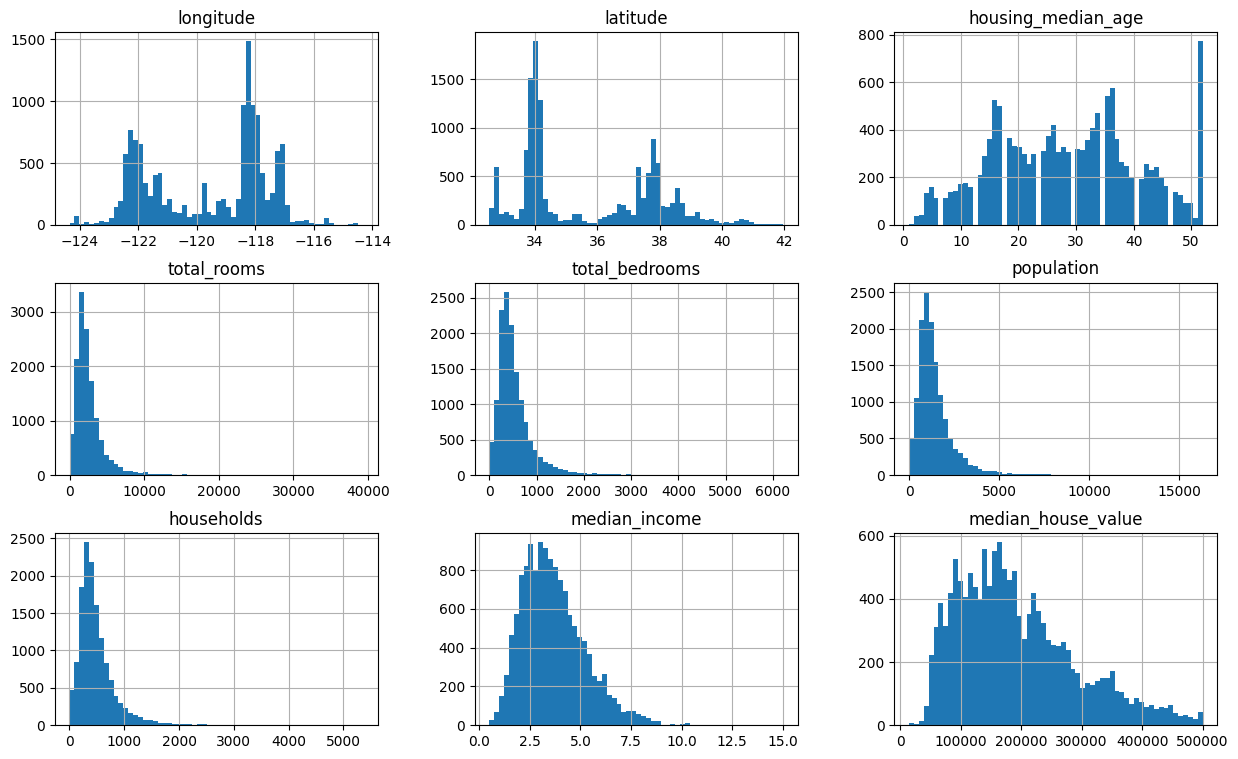

In [70]:
maxval2 = train_data['median_house_value'].max() # get the maximum value
train_data_upd = train_data[train_data['median_house_value'] != maxval2] 
test_data_upd = test_data[test_data['median_house_value'] != maxval2]
train_data_upd.hist(bins=60, figsize=(15,9))
plt.show()

# FEATURE ENGINEERING

Creation and modification of the feature matrix data,Feature Engineering is quite important and quite a cyclic process, we want to input a feature matrix that will help teach a model something useful.<br>
We want to make sure we feed the model data that is most relevant to the prediction of a target variable, perhaps as less overlapping as possible as well.<br>
Features with very high correlation teach a model similar things, multiple times, maybe consider combing them and dropping the others.<br>
<br>
Some things we could try:<br>
In this problem, we don't have a lot of features to play around with, but we noted that we have a few which are quite similar. Let's create a relatively simple combination from them, and drop the rest.<br>
We'll also create a feature which combines both coordinates as the we saw in the multivariate data, there is a relation that changes quite steadily on the diagonal (moving closer to the ocean and inland).<br>

/var/folders/t4/bptgh3hx6bz480z9tyq5f9780000gn/T/ipykernel_49664/961415536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_upd['diag_coord'] = (train_data_upd['longitude'] + train_data_upd['latitude'])         # 'diagonal coordinate', works for this coord
/var/folders/t4/bptgh3hx6bz480z9tyq5f9780000gn/T/ipykernel_49664/961415536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_upd['bedperroom'] = train_data_upd['total_bedrooms']/train_data_upd['total_rooms']     # feature w/ bed

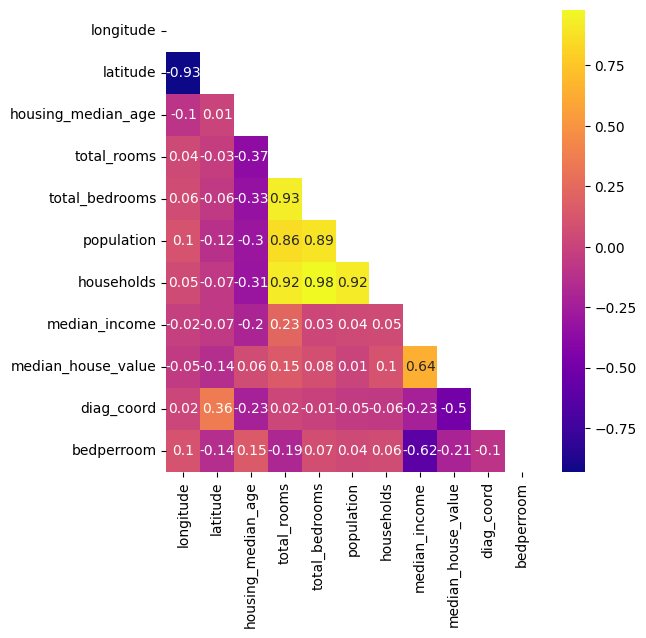

In [78]:
# Make a feature that contains both longtitude & latitude
train_data_upd['diag_coord'] = (train_data_upd['longitude'] + train_data_upd['latitude'])         # 'diagonal coordinate', works for this coord
train_data_upd['bedperroom'] = train_data_upd['total_bedrooms']/train_data_upd['total_rooms']     # feature w/ bedrooms/room ratio
corrMat(train_data_upd)

In [79]:
# update test data as well
test_data_upd['diag_coord'] = (test_data_upd['longitude'] + test_data_upd['latitude'])
test_data_upd['bedperroom'] = test_data_upd['total_bedrooms']/test_data_upd['total_rooms']     # feature w/ bedrooms/room ratio

/var/folders/t4/bptgh3hx6bz480z9tyq5f9780000gn/T/ipykernel_49664/452940083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_upd['diag_coord'] = (test_data_upd['longitude'] + test_data_upd['latitude'])
/var/folders/t4/bptgh3hx6bz480z9tyq5f9780000gn/T/ipykernel_49664/452940083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_upd['bedperroom'] = test_data_upd['total_bedrooms']/test_data_upd['total_rooms']     # feature w/ bedrooms/room ratio


In [80]:
test_data_upd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,diag_coord,bedperroom
7310,-118.19,33.99,36.0,1273.0,379.0,1398.0,353.0,2.4516,147800.0,<1H OCEAN,-84.20,0.297722
4402,-118.28,34.09,49.0,3828.0,1197.0,2862.0,1009.0,2.4677,219200.0,<1H OCEAN,-84.19,0.312696
1929,-121.07,38.66,22.0,1831.0,274.0,813.0,269.0,4.6394,173400.0,INLAND,-82.41,0.149645
11551,-117.98,33.75,37.0,1264.0,274.0,783.0,273.0,3.3438,199600.0,<1H OCEAN,-84.23,0.216772
9882,-121.79,36.68,22.0,6912.0,1513.0,3794.0,1455.0,3.0608,168300.0,<1H OCEAN,-85.11,0.218895
...,...,...,...,...,...,...,...,...,...,...,...,...
16942,-122.31,37.56,52.0,2351.0,494.0,1126.0,482.0,3.9688,356900.0,NEAR OCEAN,-84.75,0.210123
893,-121.95,37.54,29.0,3517.0,645.0,1724.0,585.0,4.6641,248900.0,<1H OCEAN,-84.41,0.183395
11723,-120.06,39.25,21.0,2459.0,525.0,584.0,233.0,3.0100,163500.0,INLAND,-80.81,0.213501
244,-122.22,37.78,44.0,2968.0,710.0,2269.0,610.0,2.3906,111700.0,NEAR BAY,-84.44,0.239218


# Regression Models

In [119]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [108]:
#making dictionary of models
models = {
    'SVR':SVR(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [122]:
model_results = []
model_names = []

# training the model with function
for name, model in models.items():
    a = model.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    
df_results

,Model,RMSE
3,SGDRegressor,2015082188978623.5
0,SVR,118440.418464
2,ElasticNet,72409.77022
5,LinearRegression,69424.818757
1,Ridge,69424.444638
4,BayesianRidge,69421.81278
6,RandomForestRegressor,48161.273108
